In [9]:
import pandas as pd

# 데이터 추출 (~2022)
data = pd.read_csv('../data/dataframe_final.csv', index_col=0)
label = pd.read_csv('../data/label_final.csv', index_col=0)

# 라벨 추출 (2023)
data2023 = pd.read_csv('../data/dataframes/dataframe_2023to2023.csv', index_col=0)
label2023 = pd.read_csv('../data/dataframes/label_2023to2023.csv', index_col=0)

In [10]:
# 인덱스(연-월-일) 삭제

X_train = data.reset_index(drop=True)
y_train = label.reset_index(drop=True)
X_test = data2023.reset_index(drop=True)
y_test = label2023.reset_index(drop=True)

In [11]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(313187, 11) (313187, 1)
(5300, 11) (5300, 1)


In [12]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [15]:
parameters={"splitter":["best","random"],
            "max_depth" : [50, 100, 150, 200],
           "min_samples_leaf":[5, 10, 15],
           "min_weight_fraction_leaf":[0.1,0.3,0.5],
           "max_leaf_nodes":[None,10,50,90] }

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

grid_cv = GridSearchCV(DecisionTreeRegressor(),param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=1, refit=True)
grid_cv.fit(X_train, y_train)



Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


c:\itbank\preject2\project\BillboardAnalitics\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
864 fits failed out of a total of 3456.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
864 fits failed with the following error:
Traceback (most recent call last):
  File "c:\itbank\preject2\project\BillboardAnalitics\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\itbank\preject2\project\BillboardAnalitics\.venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\itbank\preject2\project\BillboardAnalitics\.venv\Lib\site-packages\sklearn\base.py", line 

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [50, 100, 150, 200],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 50, 90],
                         'min_samples_leaf': [5, 10, 15],
                         'min_weight_fraction_leaf': [0.1, 0.3, 0.5],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# 테스트 데이터 랜덤 인덱스 추출

import numpy as np

test_idx = np.random.choice(X_test.shape[0], 100)

In [ ]:
# 랜덤 추출한 인덱스를 통해 테스트 데이터와 라벨 생성

X_test_sample = X_test.iloc[test_idx]
y_test_sample = y_test.iloc[test_idx]

In [ ]:
# 테스트 데이터 예측

pred = dt.predict(X_test_sample)

In [ ]:
# 예측한 100개 데이터에 대한 실제 값(열이 1개인 데이터프레임)을 넘파이로 변환

real = y_test_sample['0'].to_numpy()

In [ ]:
# matplotlib 한글 패치

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False


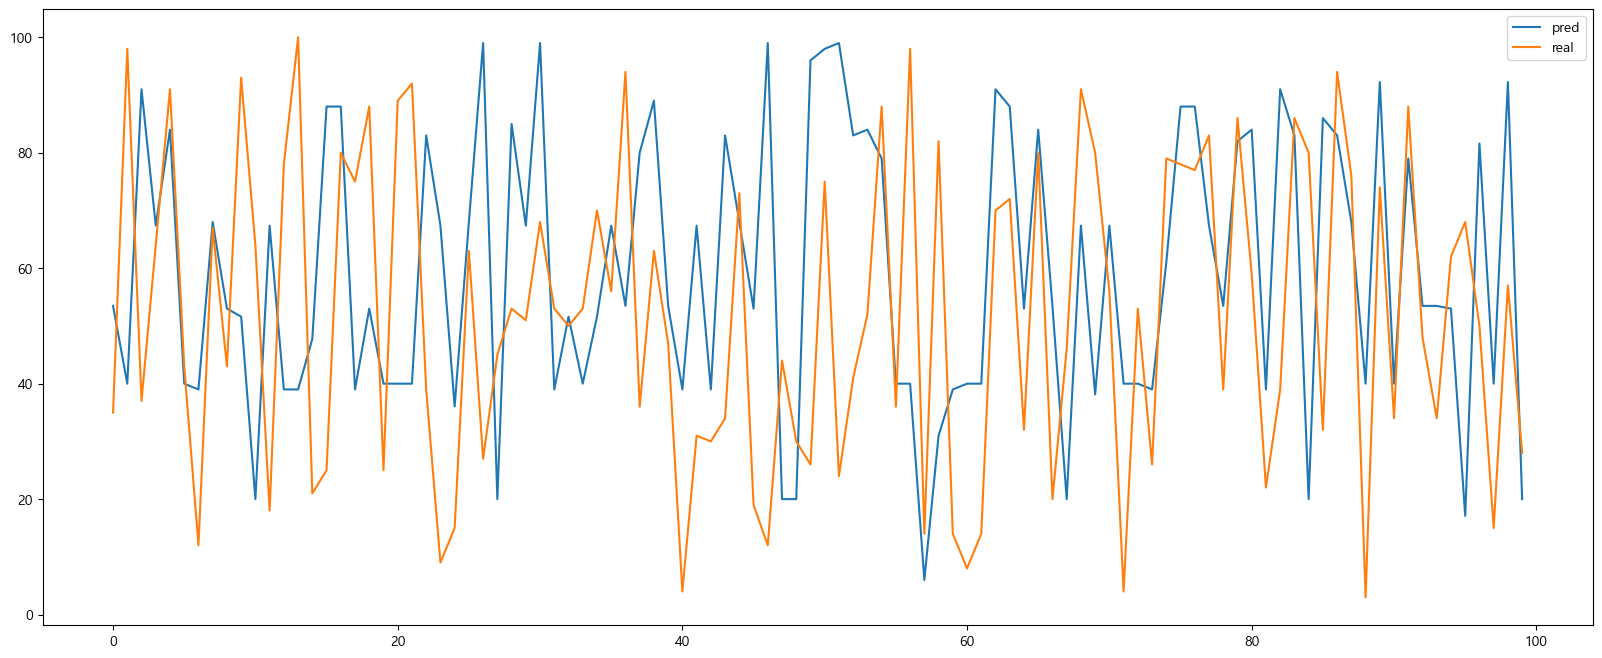

In [ ]:
# 그래프 시각화

plt.figure(figsize=(20,8))
plt.plot(pred, label='pred')
plt.plot(real, label='real')
plt.legend()
plt.show()

In [ ]:
# 어림도 없지 바로 과대적합 200%